# Session 11 SHP - XGBoost



XGBoost, singkatan dari "eXtreme Gradient Boosting", adalah algoritma machine learning yang sangat populer dan efektif, terutama dalam kompetisi data science dan berbagai aplikasi praktis. Berikut adalah beberapa aspek kunci dari XGBoost:

**Konsep Dasar**
1. **Boosting**: XGBoost adalah bagian dari keluarga algoritma "boosting" yang bertujuan untuk meningkatkan kekuatan prediktif dengan menggabungkan banyak model yang lemah (biasanya pohon keputusan) menjadi satu model yang kuat. Algoritma ini beroperasi dengan menambahkan model secara iteratif, di mana setiap model baru mencoba memperbaiki kesalahan yang dibuat oleh model sebelumnya.

2. **Gradient Boosting**: XGBoost menggunakan teknik khusus yang disebut "gradient boosting", di mana setiap tahap dalam penambahan model baru berusaha mengurangi "gradient" dari fungsi kerugian (loss function), yang merupakan ukuran kesalahan antara prediksi dan nilai sebenarnya.

![](https://www.researchgate.net/publication/348025909/figure/fig2/AS:1020217916416002@1620250314481/Simplified-structure-of-XGBoost.ppm)




**Arsitektur XGBoost**

1. **Instance**: Ini adalah data input yang akan diprediksi oleh model. Dalam konteks klasifikasi, ini bisa berupa satu set fitur dari satu contoh yang ingin diklasifikasikan.

2. **Tree-1**: Pohon pertama (Tree-1) mencoba memprediksi target berdasarkan instance. Ini biasanya adalah pohon keputusan yang sederhana, juga disebut sebagai "weak learner".

3. **Result_1**: Hasil dari pohon pertama ini adalah prediksi awal untuk target. Prediksi ini kemungkinan besar tidak sempurna dan akan memiliki beberapa tingkat kesalahan.

4. **Residual**: Kesalahan prediksi pohon pertama (selisih antara prediksi dan nilai sebenarnya) disebut residual. Residual ini akan digunakan sebagai input untuk pohon selanjutnya agar dapat memperbaiki kesalahan yang ada.

5. **Tree-2**: Pohon kedua (Tree-2) kemudian dibangun dengan tujuan untuk memprediksi residual dari pohon pertama, bukan target asli. Ini berarti Tree-2 berusaha memperbaiki kesalahan yang dibuat oleh Tree-1.

6. **Result_2**: Hasil dari pohon kedua ini adalah prediksi terhadap residual. Prediksi ini akan ditambahkan ke prediksi sebelumnya untuk meningkatkan akurasi.

7. **Tree-3**: Proses ini berlanjut dengan pohon ketiga (Tree-3), yang kembali dibangun untuk memprediksi residual dari hasil gabungan Tree-1 dan Tree-2.

8. **Result_3**: Hasil dari pohon ketiga menawarkan perbaikan lebih lanjut, dan kembali, hasil ini ditambahkan ke hasil sebelumnya.

9. **Sum**: Hasil dari semua pohon (dalam diagram ini ada tiga pohon) kemudian dijumlahkan. Setiap pohon memberikan kontribusi untuk memperbaiki kesalahan dari hasil prediksi sebelumnya.

10. **Final Result**: Hasil penjumlahan dari semua pohon merupakan prediksi akhir model XGBoost. Dengan menggabungkan prediksi dari banyak pohon, XGBoost mencapai prediksi yang lebih akurat dan robust.

Proses ini, yang dikenal sebagai "ensemble learning", menggabungkan banyak model lemah untuk membuat satu model yang kuat. XGBoost melakukan ini dengan cara yang sangat efisien, yang memungkinkan untuk pemodelan prediktif yang sangat efektif pada dataset besar dan kompleks.

## 1. Load Dataset "Data FillingA1"

**ChatGPT Prompt:**

Berikan saya code python untuk menghubungkan google colab dengan google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**ChatGPT Prompt:**

Berikan code untuk load dataset "Data FillingA1.xlsx' pada folder Dataset di google drive

In [2]:
import pandas as pd

# Path ke file Excel di Google Drive
file_path = '/content/drive/My Drive/Dataset/Data FillingA1.xlsx'

# Membaca file Excel menggunakan pandas
df = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama dari dataframe
print(df.head())


          dtmInsertedDate  intAugerAcc  intSpeedDischarge  intAugerTimeError  \
0 2023-10-25 19:55:03.227        12000                300                 10   
1 2023-10-25 19:55:13.193        12000                300                 10   
2 2023-10-25 19:55:23.257        12000                300                 10   
3 2023-10-25 19:55:33.207        12000                300                 10   
4 2023-10-25 19:55:43.287        12000                300                 10   

   intCrossJawSealTime  intVerticalSealTime  decCrossJawFrontSet  \
0                  300                    0                  155   
1                  300                    0                  155   
2                  300                    0                  155   
3                  300                    0                  155   
4                  300                    0                  155   

   decCrossJawFrontActual  decCrossJawRearSet  decCrossJawRearActual  \
0                   155.6             

Dataset **"Filling Mesin A1"** memiliki kolom-kolom berikut:

1. **dtmInsertedDate**: Tanggal dan waktu perekaman data, dengan format tahun-bulan-hari dan jam:menit:detik.milidetik.
2. **intAugerAcc**: Nilai akumulasi Auger, kemungkinan berhubungan dengan jumlah atau volume material yang diproses.
3. **intSpeedDischarge**: Kecepatan pengeluaran material dari mesin.
4. **intAugerTimeError**: Waktu kesalahan Auger, mungkin mengindikasikan penyimpangan dalam operasi normal.
5. **intCrossJawSealTime**: Waktu penyegelan Cross Jaw, dalam milidetik.
6. **intVerticalSealTime**: Waktu penyegelan Vertikal.
7. **decCrossJawFrontSet**: Pengaturan suhu depan Cross Jaw, dalam derajat.
8. **decCrossJawFrontActual**: Suhu aktual depan Cross Jaw.
9. **decCrossJawRearSet**: Pengaturan suhu belakang Cross Jaw.
10. **decCrossJawRearActual**: Suhu aktual belakang Cross Jaw.
11. **decVerticalJawSet**: Pengaturan suhu Jaw Vertikal.
12. **decVerticalJawActual**: Suhu aktual Jaw Vertikal.
13. **intWeight**: Berat, kemungkinan berhubungan dengan material yang diproses.
14. **intAugerSpeed**: Kecepatan Auger.
15. **Weight**: Berat tambahan atau koreksi berat.
16. **decimalBagLength**: Panjang kantong atau bungkus, dalam desimal.
17. **intMachineSpeed**: Kecepatan mesin.
18. **NoBO**: Nomor Batch Order atau identifikasi batch.
Kolom-kolom ini tampaknya menggambarkan parameter operasional dan pengukuran yang terkait dengan proses pengisian mesin A1, termasuk suhu, kecepatan, waktu, dan pengukuran berat

## 2. EDA (Exploratory Data Analysis)

**ChatGPT Prompt:**

Berikan code untuk melakukan EDA pada dataset tersebut

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   dtmInsertedDate         2515 non-null   datetime64[ns]
 1   intAugerAcc             2515 non-null   int64         
 2   intSpeedDischarge       2515 non-null   int64         
 3   intAugerTimeError       2515 non-null   int64         
 4   intCrossJawSealTime     2515 non-null   int64         
 5   intVerticalSealTime     2515 non-null   int64         
 6   decCrossJawFrontSet     2515 non-null   int64         
 7   decCrossJawFrontActual  2515 non-null   float64       
 8   decCrossJawRearSet      2515 non-null   int64         
 9   decCrossJawRearActual   2515 non-null   float64       
 10  decVerticalJawSet       2515 non-null   int64         
 11  decVerticalJawActual    2515 non-null   float64       
 12  intWeight               2515 

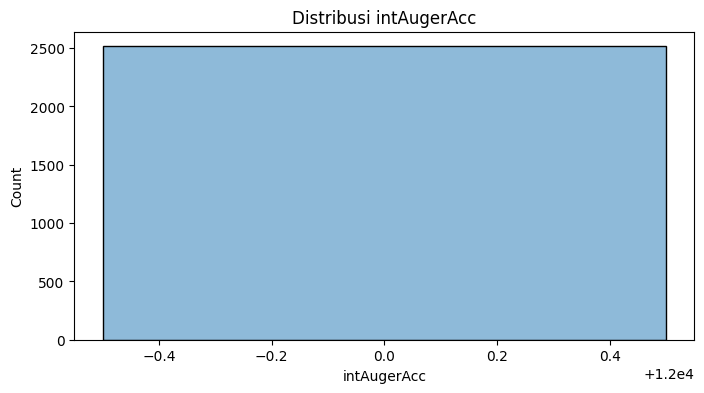

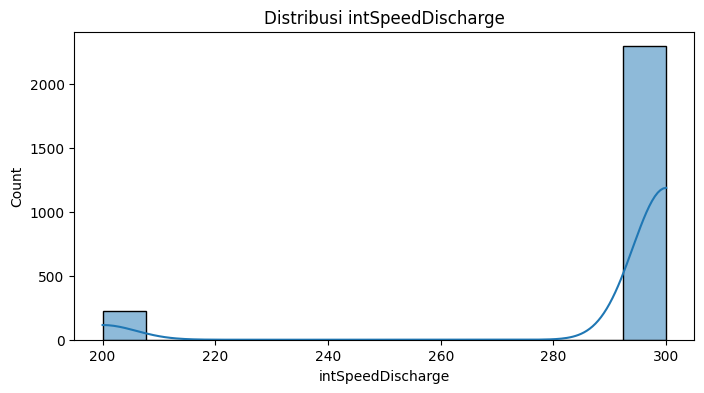

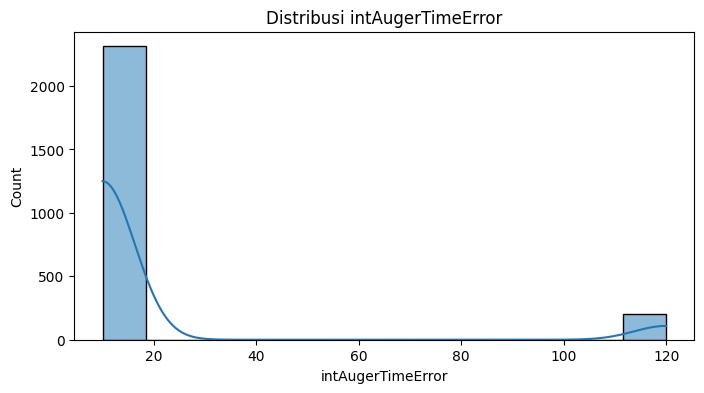

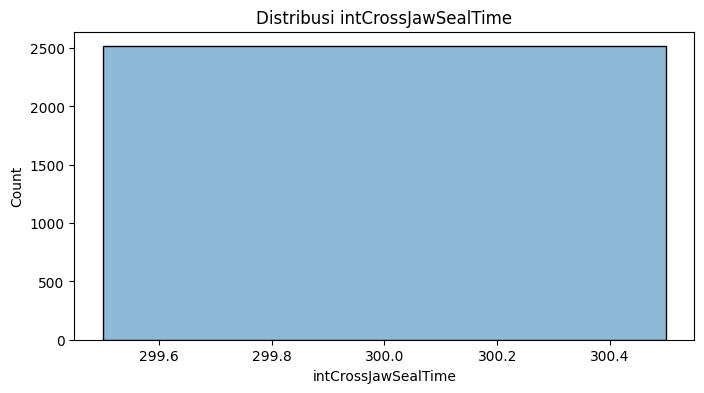

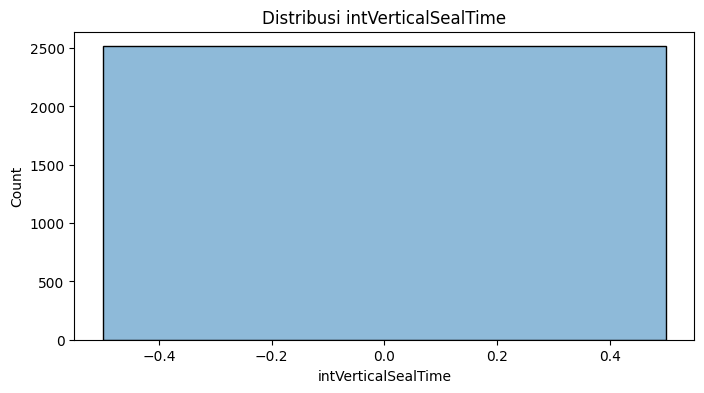

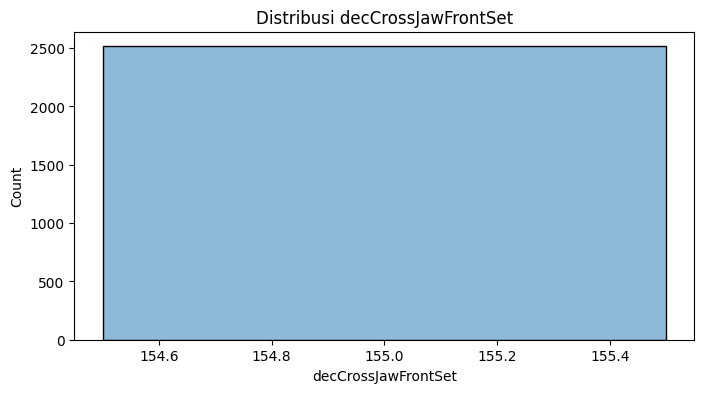

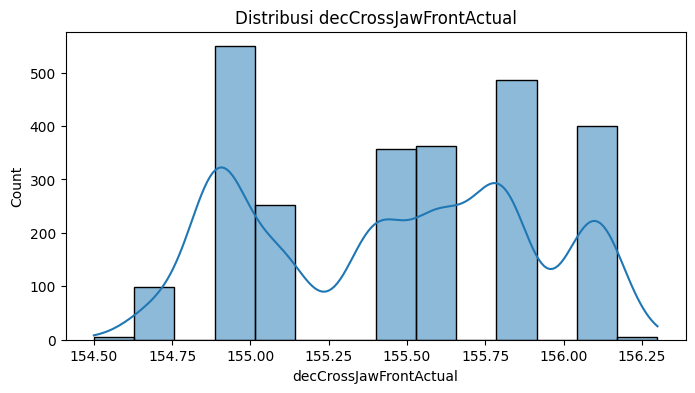

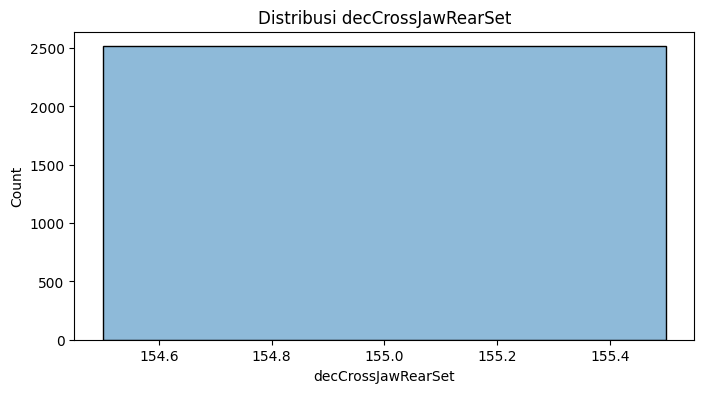

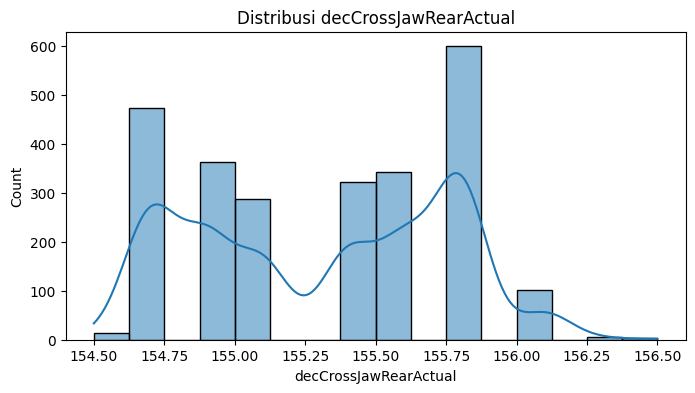

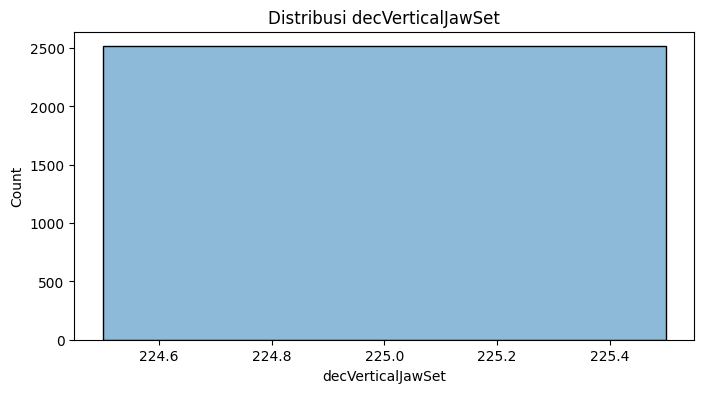

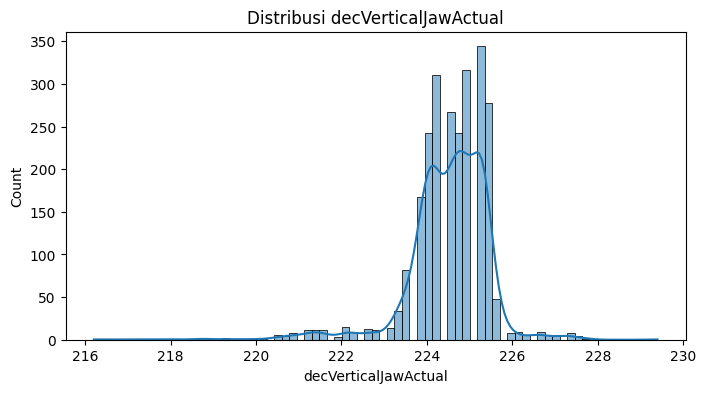

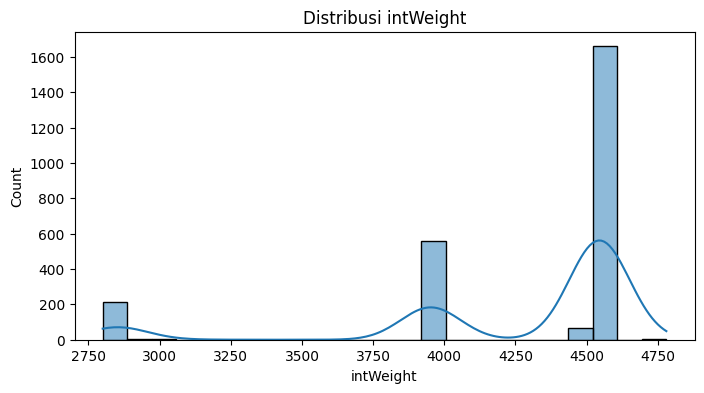

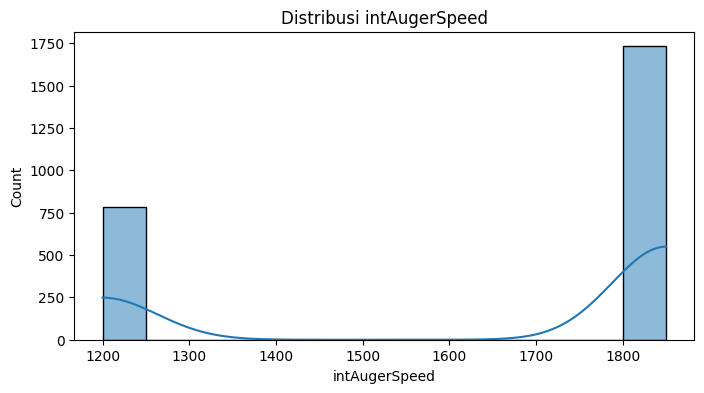

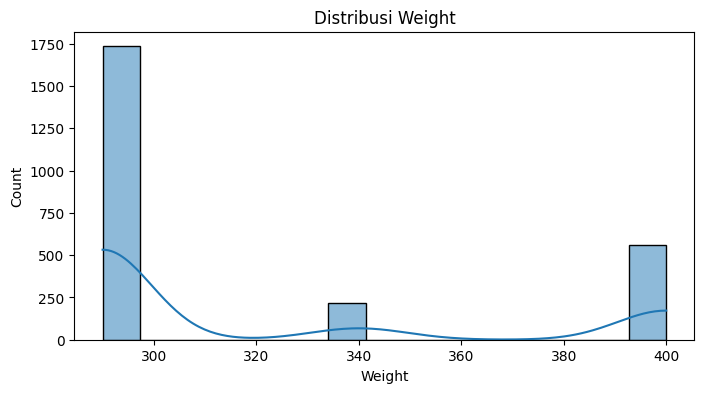

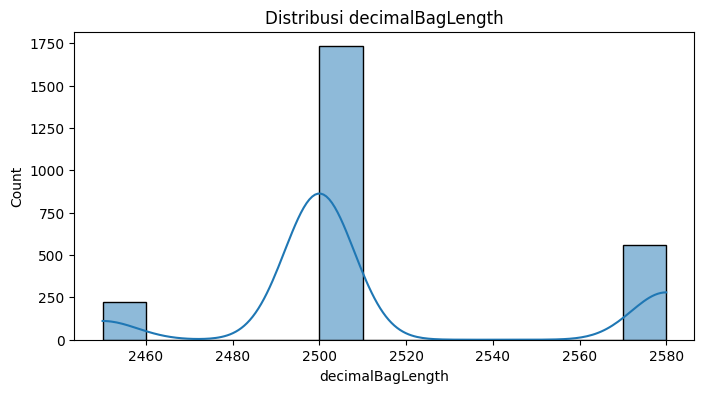

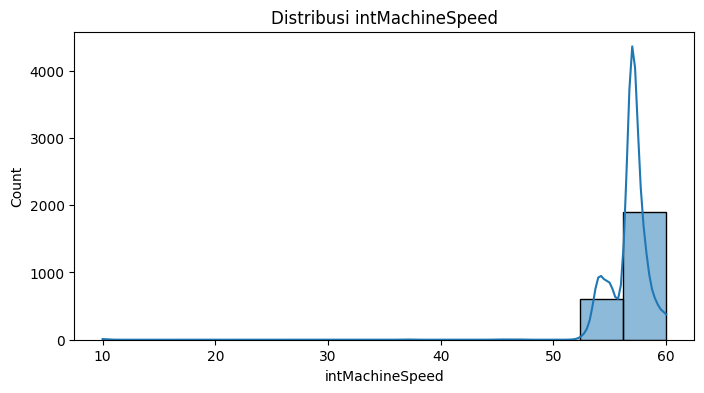

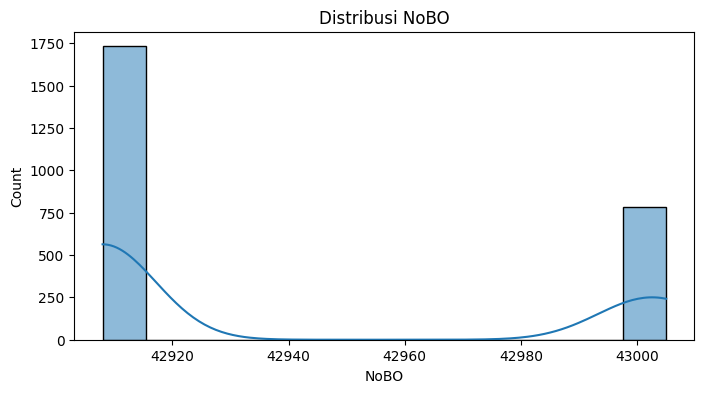

In [3]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan informasi dasar tentang dataset
print("Informasi Dataset:")
print(df.info())

# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Memeriksa missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualisasi distribusi variabel numerik
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')
    plt.show()


## 3. Feature Selection

Feature selection adalah proses memilih fitur yang paling relevan untuk digunakan dalam model Machine Learning.

Berdasarkan nilai korelasi yang tinggi antara beberapa pasangan fitur dalam dataset yang sudah diketahui melalui Orange, kita dapat merancang use case machine learning di bidang manufaktur. Mari kita pilih salah satu skenario yang umum dalam industri manufaktur: **Optimasi Proses Pengemasan**.

### **Use Case: Optimasi Proses Pengemasan**

**Tujuan**: Meningkatkan efisiensi dan kualitas proses pengemasan dengan mengoptimalkan kecepatan auger dan kecepatan discharge berdasarkan berat target yang diinginkan.

#### Analisis Korelasi:
1. **`Weight` dan `intAugerSpeed`** (-0.942): Korelasi negatif yang sangat tinggi ini menunjukkan bahwa saat kecepatan auger meningkat, berat cenderung menurun. Ini bisa menjadi informasi penting dalam mengontrol kualitas pengemasan.
2. **`intWeight` dan `intSpeedDischarge`** (+0.874): Hubungan positif yang kuat ini menandakan bahwa kecepatan discharge dan berat paket berhubungan erat, yang berguna untuk menyesuaikan kecepatan discharge berdasarkan berat yang diinginkan.
3. **`intAugerSpeed` dan `intWeight`** (+0.835): Hubungan positif ini bisa menunjukkan bahwa kecepatan auger mempengaruhi berat paket, walaupun tidak sekuat hubungan `Weight` dan `intAugerSpeed`.
4. **`Weight` dan `decimalBagLength`** (+0.776): Hubungan positif ini menunjukkan bahwa panjang kantong pengemasan mungkin perlu disesuaikan berdasarkan berat yang diinginkan.

#### **Pilihan Fitur dan Target:**
- **Fitur**:
  - `intAugerSpeed`: Sebagai kontrol utama dalam proses pengemasan.
  - `intSpeedDischarge`: Untuk mengoptimalkan kecepatan discharge sesuai dengan kebutuhan.
  - `decimalBagLength`: Sebagai faktor yang mempengaruhi efisiensi pengemasan.

- **Target**:
  - `Weight` atau `intWeight`: Bergantung pada kebutuhan presisi. Jika presisi tinggi dan variasi kecil dalam berat sangat penting, maka `Weight` (yang mungkin merupakan data float/desimal) adalah pilihan yang lebih baik. Jika variasi kecil dalam berat tidak terlalu kritikal, `intWeight` (data integer) mungkin cukup.

#### **Skenario Machine Learning:**
Model machine learning dapat dikembangkan untuk memprediksi berat yang dihasilkan berdasarkan kecepatan auger, kecepatan discharge, dan panjang kantong. Dengan menggunakan XGBoost, model ini bisa mempelajari hubungan kompleks antara fitur-fitur ini dan berat target. Tujuannya adalah untuk menyesuaikan parameter-parameter ini secara otomatis untuk mencapai berat target yang diinginkan dengan efisiensi maksimal. Ini akan membantu dalam mengurangi pemborosan material, meningkatkan kecepatan produksi, dan memastikan konsistensi kualitas produk.

Pemilihan antara `Weight` dan `intWeight` sebagai target akan bergantung pada tingkat presisi yang diperlukan dalam konteks pengemasan produk Anda. Jika produk memerlukan akurasi tinggi dalam pengukuran berat, maka `Weight` harus dipilih. Jika toleransi lebih luas diperbolehkan, maka `intWeight` mungkin sudah memadai.

---

**ChatGPT Prompt:**

Berikan code untuk membagi dataset menjadi data training, validasi, dan testing untuk machine learning. Atur kolom "intAugerSpeed" dan "intSpeedDischarge" menjadi fitur dan kolom "Weight" menjadi target pada df. Print shape setiap dataset


In [17]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data pelatihan (80%) dan data sisa (20%)
X_temp, X_test, y_temp, y_test = train_test_split(df[['intAugerSpeed', 'intSpeedDischarge']], df['Weight'], test_size=0.2, random_state=42)

# Memisahkan data sisa menjadi data pelatihan (60%) dan data validasi (20%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Menampilkan bentuk (shape) dari masing-masing dataset
print("Shape X_train:", X_train.shape)
print("Shape X_val:", X_val.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_val:", y_val.shape)
print("Shape y_test:", y_test.shape)


Shape X_train: (1509, 2)
Shape X_val: (503, 2)
Shape X_test: (503, 2)
Shape y_train: (1509,)
Shape y_val: (503,)
Shape y_test: (503,)


## 4. Training Machine Learning

Untuk melatih model regresi linier menggunakan dataset yang Anda miliki dan kemudian mengevaluasi model tersebut, Anda dapat menggunakan library scikit-learn di Python. Langkah-langkahnya termasuk melatih model dengan data training (X_train dan y_train) dan kemudian mengevaluasi kinerjanya dengan data testing (X_test dan y_test).

**ChatGPT Prompt:**

Berikan code untuk melakukan training machine learning dengan menggunakan XGBoost pada data training, kemudian evaluasi hasil model dengan data testing menggunakan MSE, RMSE, MAE, dan R^2

In [19]:
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_squared_error, mean_absolute_error, r2_score

# Create the decision tree regressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the regressor on the training set
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

MSE: 0.011348704387620102
RMSE: 0.10653029797958936
MAE: 0.030414527758821044
R^2: 0.9999946652683575



Penjelasan kode:
- `XGBRegressor` dari XGBoost digunakan untuk membuat instance model regresi. Parameter `objective='reg:squarederror'` menentukan bahwa tujuan model adalah regresi dengan squared error sebagai fungsi loss.
- Metode `fit()` digunakan untuk melatih model dengan menggunakan set data pelatihan (`X_train`, `y_train`).
- Metode `predict()` digunakan untuk membuat prediksi pada set data pengujian (`X_test`).
- Metrik evaluasi seperti MSE, RMSE, MAE, dan R^2 dihitung menggunakan hasil prediksi dan nilai sebenarnya (`y_test`).

Pastikan bahwa Anda telah mempersiapkan `X_train`, `X_test`, `y_train`, dan `y_test` dari dataset Anda sebelum menjalankan kode ini. Anda juga dapat menyesuaikan parameter model XGBoost (seperti `learning_rate`, `max_depth`, `n_estimators`, dll.) untuk meningkatkan kinerja model sesuai kebutuhan spesifik dataset Anda.

## 5. Fine Tuning Hyperparameter

Fine tuning pada model XGBoost melibatkan penyesuaian parameter untuk meningkatkan kinerja model. Kita dapat menggunakan `GridSearchCV` dari Scikit-learn untuk mencari kombinasi parameter terbaik.

**ChatGPT Prompt**

Berikan code untuk melakukan fine tuning hyperparameter pada model XGBoost

In [22]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Inisialisasi model XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Definisikan parameter yang ingin dioptimalkan
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.3, 0.7],
    'gamma': [0, 0.1, 0.2]
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Melatih GridSearchCV pada data training
grid_search.fit(X_train, y_train)

# Mendapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Membuat model dengan parameter terbaik
best_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params)

# Melatih model dengan parameter terbaik pada data training
best_xgb_model.fit(X_train, y_train)

# Memprediksi target pada data testing
y_pred = best_xgb_model.predict(X_test)

# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters: {'colsample_bytree': 0.3, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Mean Squared Error (MSE): 0.011308454327048294
Root Mean Squared Error (RMSE): 0.10634121650163822
Mean Absolute Error (MAE): 0.03077439901605989
R-squared (R2): 0.9999946841888672


Dalam contoh ini, kami mendefinisikan beberapa parameter untuk disesuaikan seperti `max_depth`, `learning_rate`, `n_estimators`, `colsample_bytree`, dan `gamma`. `GridSearchCV` akan mencari melalui kombinasi parameter ini untuk menemukan set yang memberikan skor terbaik menurut `neg_mean_squared_error` pada validasi silang (cross-validation) dengan 3-fold.

Setelah menemukan parameter terbaik, kami menggunakan model terbaik ini untuk melakukan prediksi pada set pengujian dan kemudian mengevaluasi kinerjanya dengan metrik MSE, RMSE, MAE, dan R^2.

Perhatikan bahwa fine tuning membutuhkan sumber daya komputasi dan waktu yang cukup besar, terutama bila jumlah kombinasi parameter yang diuji cukup banyak. Pastikan juga untuk menyesuaikan `param_grid` dengan nilai-nilai yang sesuai untuk kasus penggunaan Anda.

Hasil berikut adalah output dari proses fine tuning hyperparameter menggunakan Grid Search pada model XGBoost:

- `colsample_bytree`: Parameter ini mengontrol fraksi fitur yang akan digunakan dalam setiap pohon (tree) dalam model XGBoost. Hasilnya adalah 0.3, yang berarti hanya sekitar 30% dari fitur akan digunakan dalam setiap pohon.

- `gamma`: Parameter ini mengontrol berapa banyak pemotongan (pruning) yang akan dilakukan pada pohon. Nilainya adalah 0.2, yang menunjukkan bahwa pemotongan akan dilakukan jika ada penurunan dalam loss function yang signifikan (lebih besar dari 0.2).

- `learning_rate`: Ini adalah laju pembelajaran yang mengontrol seberapa besar perubahan bobot yang akan diterapkan selama setiap iterasi. Nilainya adalah 0.2, yang menunjukkan bahwa perubahan bobot akan cukup besar setiap kali.

- `max_depth`: Parameter ini mengontrol kedalaman maksimum dari setiap pohon dalam model. Hasilnya adalah 3, yang berarti pohon-pohon dalam model XGBoost akan memiliki kedalaman maksimum 3.

- `n_estimators`: Ini adalah jumlah pohon (tree) yang akan dibangun dalam model. Hasilnya adalah 200, yang berarti akan ada 200 pohon dalam model XGBoost.

Hasil ini adalah kombinasi parameter terbaik yang ditemukan oleh Grid Search untuk mencapai kinerja yang optimal pada data pelatihan. Dengan parameter-parameter ini, model XGBoost memiliki kemampuan yang baik untuk memprediksi target pada data pengujian.

## 6. Actual vs Predicted

**ChatGPT Prompt:**

Berikan code untuk menampilkan beberapa baris pertama dari DataFrame yang membandingkan nilai sebenarnya dan prediksi

In [8]:
import pandas as pd

# Asumsi bahwa y_pred telah dihasilkan dari model XGBoost
# y_pred = best_model.predict(X_test) # Misalnya

# Membuat DataFrame untuk membandingkan nilai sebenarnya dan prediksi
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Menampilkan beberapa baris pertama dari DataFrame
comparison_df.head()


Actual   Predicted
617      290  290.007477
927      290  290.007477
942      290  290.007477
973      290  290.007477
1967     400  399.971893